# Stock Price Prediction using Time Series Analysis
<hr>

### Part 1 - Data Preprocessing

#### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Importing the Training Set

In [2]:
dataset_train = pd.read_csv("dataset/Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [4]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

#### Feature Scaling

**Two Ways of Applying Feature Scaling:**

<table>
    <tr>
        <th>Standardisation</th>
        <th>Normalisation</th>
    </tr>
    <tr>
        <td>x<sub>stand</sub> = x - mean(x) <i><b>/</i></b> standard deviation(x)</td>
        <td>x<sub>norm</sub> = x - min(x) <i><b>/</i></b> max(x) - min(x)</td>
    </tr>
</table>

In [5]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1), copy = True)
training_set_scaled = sc.fit_transform(training_set)

In [6]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

#### Creating a Data Structure with 60 Timesteps and 1 Output

In [7]:
X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [9]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

#### Reshaping

In [10]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

<hr>

### Part 2 - Building and Training the RNN

#### Importing the Keras Libraries and Packages

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#### Initialising the RNN

In [12]:
regressor = Sequential()

#### Adding the First LSTM Layer and Some Dropout Regularisation

In [13]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

#### Adding a Second LSTM Layer and Some Dropout Regularisation

In [14]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#### Adding a Third LSTM Layer and Some Dropout Regularisation

In [15]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#### Adding a Fourth LSTM Layer and Some Dropout Regularisation

In [16]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

#### Adding the Output Layer

In [17]:
regressor.add(Dense(units = 1))

#### Compiling the RNN

In [18]:
regressor.compile(optimizer = "adam", loss = "mean_squared_error")

#### Fitting the RNN to the Training Set

In [19]:
regressor.fit(X_train, y_train, epochs = 200, batch_size = 32)

Epoch 1/200
38/38 [==============================] - 7s 52ms/step - loss: 0.0385
Epoch 2/200
38/38 [==============================] - 2s 56ms/step - loss: 0.0068
Epoch 3/200
38/38 [==============================] - 2s 51ms/step - loss: 0.0061
Epoch 4/200
38/38 [==============================] - 2s 50ms/step - loss: 0.0052
Epoch 5/200
38/38 [==============================] - 2s 50ms/step - loss: 0.0048
Epoch 6/200
38/38 [==============================] - 2s 51ms/step - loss: 0.0048
Epoch 7/200
38/38 [==============================] - 2s 50ms/step - loss: 0.0049
Epoch 8/200
38/38 [==============================] - 2s 51ms/step - loss: 0.0043
Epoch 9/200
38/38 [==============================] - 2s 51ms/step - loss: 0.0051
Epoch 10/200
38/38 [==============================] - 2s 51ms/step - loss: 0.0047
Epoch 11/200
38/38 [==============================] - 2s 55ms/step - loss: 0.0048
Epoch 12/200
38/38 [==============================] - 2s 65ms/step - loss: 0.0045
Epoch 13/200
38/38 [=====

<hr>

### Part 3 - Making The Predictions and Visualising The Results

#### Getting The Real Stock Price of 2017

In [20]:
dataset_test = pd.read_csv("dataset/Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

In [21]:
dataset_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [22]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

#### Getting The Predicted Stock Price of 2017

In [23]:
# For horizontal concatenation -> axis = 1
# For vertical concatenation -> axis = 0
dataset_total = pd.concat((dataset_train["Open"], dataset_test["Open"]), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


In [24]:
dataset_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [25]:
inputs

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [26]:
X_test

array([[[0.9299055 ],
        [0.93113327],
        [0.92750577],
        ...,
        [0.95725128],
        [0.93796041],
        [0.93688146]],

       [[0.93113327],
        [0.92750577],
        [0.94415507],
        ...,
        [0.93796041],
        [0.93688146],
        [0.92955205]],

       [[0.92750577],
        [0.94415507],
        [0.93876032],
        ...,
        [0.93688146],
        [0.92955205],
        [0.94731751]],

       ...,

       [[0.96054394],
        [0.9371419 ],
        [0.92841729],
        ...,
        [1.01045465],
        [1.02407173],
        [1.03930724]],

       [[0.9371419 ],
        [0.92841729],
        [0.90804747],
        ...,
        [1.02407173],
        [1.03930724],
        [1.03354044]],

       [[0.92841729],
        [0.90804747],
        [0.8771858 ],
        ...,
        [1.03930724],
        [1.03354044],
        [0.99624228]]])

In [27]:
predicted_stock_price

array([[755.63635],
       [753.9539 ],
       [760.05493],
       [759.8902 ],
       [764.43353],
       [773.1344 ],
       [775.0227 ],
       [772.1531 ],
       [773.4856 ],
       [775.22906],
       [775.2464 ],
       [774.2814 ],
       [773.9341 ],
       [775.4564 ],
       [776.10535],
       [786.0771 ],
       [792.68384],
       [797.43085],
       [795.51196],
       [782.0922 ]], dtype=float32)

## Model Evaluation

In [28]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 33.86234549899371


#### Visualising the Results

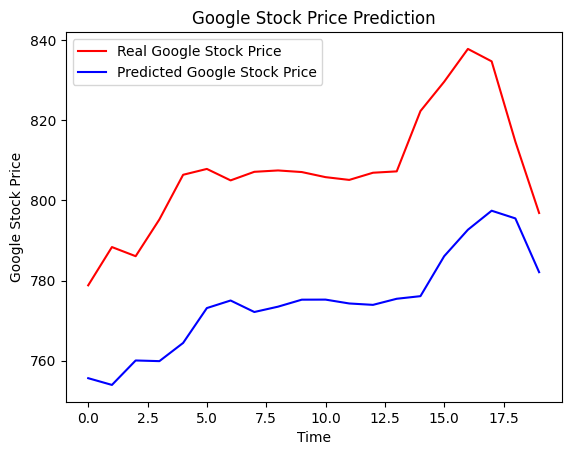

In [29]:
plt.plot(real_stock_price, color = "red", label = "Real Google Stock Price")
plt.plot(predicted_stock_price, color = "blue", label = "Predicted Google Stock Price")

plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()

<hr>